<a href="https://colab.research.google.com/github/okaysourav/DA_EDA/blob/main/eda_th_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set visual aesthetics
sns.set(style="whitegrid")


In [2]:
def load_dataset(filepath):
    df = pd.read_csv("Auto.csv")
    print("Dataset loaded successfully.")
    return df

def display_data_overview(df):
    print("First few rows of the dataset:")
    print(df.head())
    print(f"\nDataset Shape: {df.shape}")
    print("\nData Info:")
    print(df.info())
    print("\nStatistical Summary:")
    print(df.describe())


In [3]:
def handle_missing_data(df):
    missing = df.isnull().sum()
    print(f"Missing values before cleaning:\n{missing}")
    df_cleaned = df.dropna()
    print(f"Dataset after dropping missing values: {df_cleaned.shape}")
    return df_cleaned

def remove_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    df_cleaned = df.drop_duplicates()
    print(f"Dataset after removing duplicates: {df_cleaned.shape}")
    return df_cleaned

def correct_data_types(df, col, dtype):
    df[col] = df[col].astype(dtype)
    print(f"Data type of {col} corrected to {dtype}.")
    return df


In [4]:
def plot_histograms(df):
    df.hist(bins=20, figsize=(12, 8))
    plt.suptitle('Univariate Analysis: Histograms', fontsize=16)
    plt.show()

def plot_boxplots(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')
    plt.title('Outlier Detection: Boxplot for Numerical Variables')
    plt.show()

def plot_categorical_bars(df):
    for col in df.select_dtypes(include=[object]):
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df)
        plt.title(f'Univariate Analysis: {col}')
        plt.xticks(rotation=45)
        plt.show()


In [5]:
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(f'Scatter Plot: {x_col} vs {y_col}')
    plt.show()

def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

def boxplot_categorical_vs_numerical(df, cat_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Bivariate Analysis: {cat_col} vs {num_col}')
    plt.show()


In [6]:
def plot_pairplot(df):
    sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle('Multivariate Analysis: Pairplot', fontsize=16)
    plt.show()

def plot_violinplot(df, cat_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Multivariate Analysis: Violin Plot {cat_col} vs {num_col}')
    plt.show()


In [7]:
def standardize_data(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))
    print("Data standardized successfully.")
    return scaled_data

def apply_pca(scaled_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
    return pca_result

def plot_pca(pca_result):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.5)
    plt.title('PCA: Dimensionality Reduction to 2 Components')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


In [8]:
def apply_kmeans(scaled_data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_data)
    print(f'Cluster Centers: {kmeans.cluster_centers_}')
    return kmeans.labels_

def plot_clusters(pca_result, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title('K-Means Clustering (After PCA)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


In [9]:
def linear_regression_model(df, features, target):
    """Train a Linear Regression model and evaluate its performance."""
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.title('Model Evaluation: Actual vs Predicted MPG')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()


Dataset loaded successfully.
First few rows of the dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset Shape: (392, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392

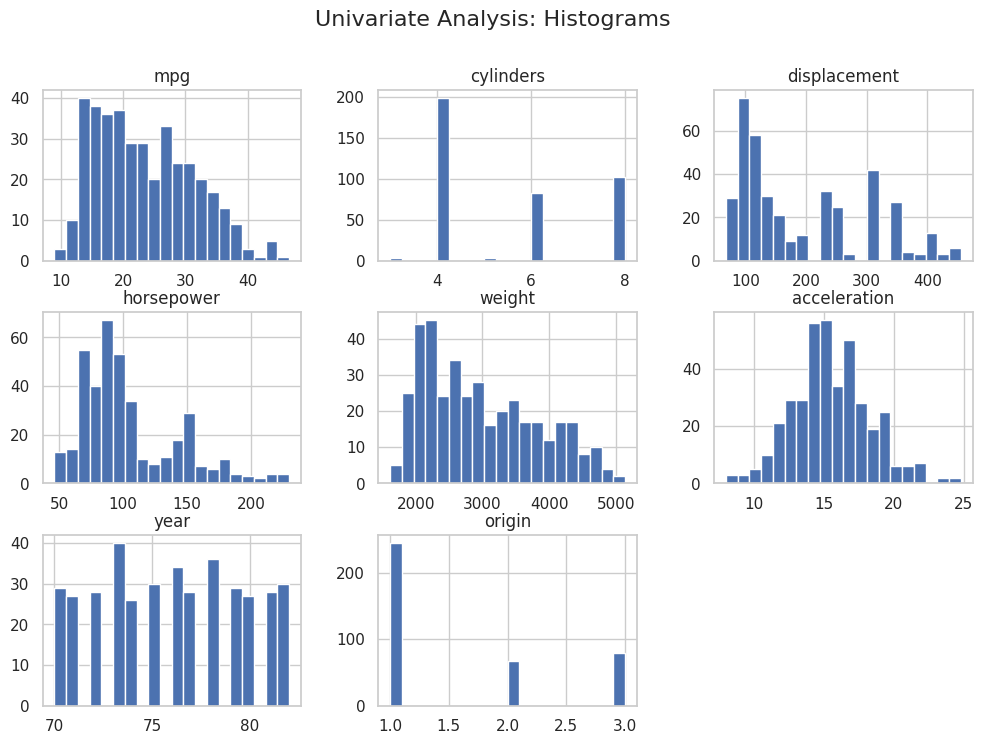

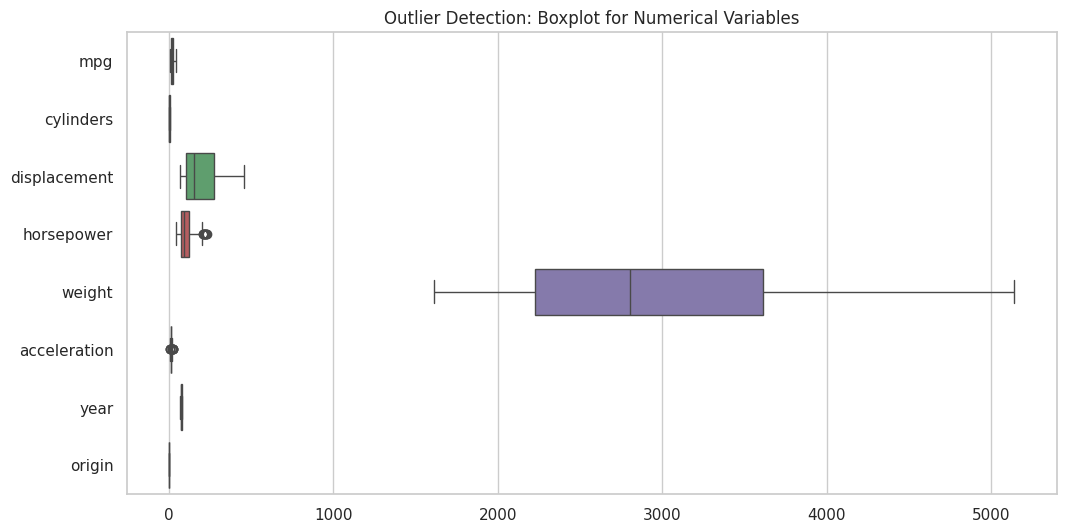

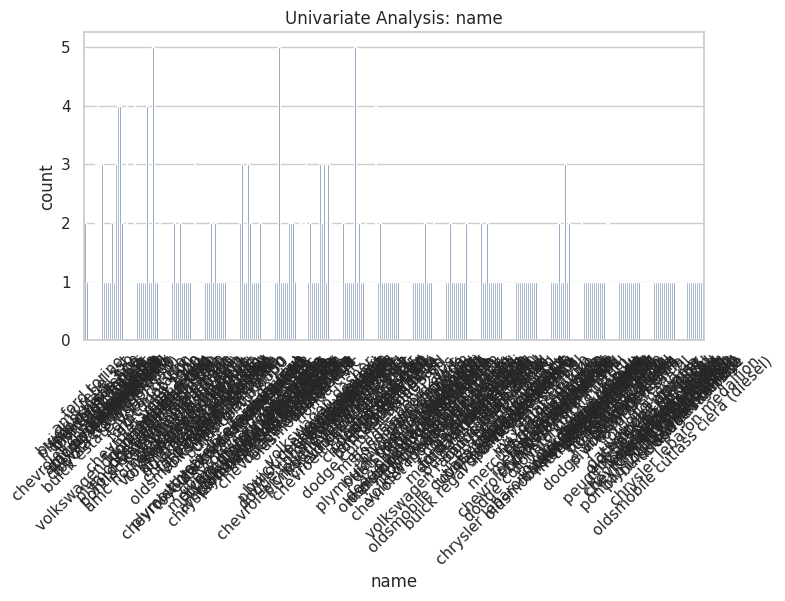

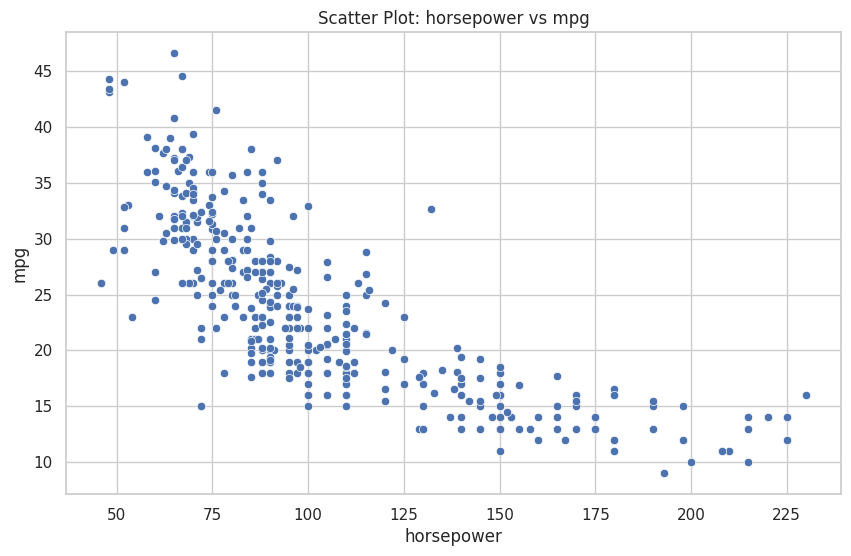

ValueError: could not convert string to float: 'chevrolet chevelle malibu'

<Figure size 1000x800 with 0 Axes>

In [14]:
def main():
    df = load_dataset("Auto.csv")
    display_data_overview(df)
    df = handle_missing_data(df)
    df = remove_duplicates(df)
    df = correct_data_types(df, 'horsepower', float)
    plot_histograms(df)
    plot_boxplots(df)
    plot_categorical_bars(df)
    scatter_plot(df, 'horsepower', 'mpg')
    correlation_heatmap(df)
    boxplot_categorical_vs_numerical(df, 'origin', 'mpg')
    plot_pairplot(df)
    plot_violinplot(df, 'origin', 'horsepower')
    scaled_data = standardize_data(df)
    pca_result = apply_pca(scaled_data)
    plot_pca(pca_result)
    labels = apply_kmeans(scaled_data)
    plot_clusters(pca_result, labels)
    linear_regression_model(df, ['horsepower', 'weight', 'displacement'], 'mpg')

if __name__ == "__main__":
    main()